In [88]:
# Evelina Ramoskaite
# Textblob
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections
import csv
import seaborn as sns

import nltk
from nltk.corpus import stopwords

from textblob import TextBlob

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [89]:

current_path = os.getcwd()
print(current_path)

C:\Users\Edvinas\PycharmProjects\CapstoneProject\venv


In [117]:
# Loading the Data

data = pd.read_csv('rated_AAL_2.csv')
data.columns

Index(['Unnamed: 0', 'timestamp', 'tweet_text', 'all_hashtags',
       'retweet_count', 'tweet_created_at', ' username', 'followers_count',
       'target'],
      dtype='object')

In [118]:
# Decoding the text columns
#import ast
#data.tweet_text = data['tweet_text'].apply(ast.literal_eval).str.decode("utf-8")
#data.username = data[' username'].apply(ast.literal_eval).str.decode("utf-8")

In [119]:
# Tweets
data.tweet_text.head(10)

0    $penn $mara $aal $tsla $opti $spy $srne $coin ...
1    The Cavaliers have lost 20 straight games at A...
2    @StrangeDiamond5 AAL;SKDFJAOW;IEFJ WALSKD;FMW;...
3    $ADVM price target to be increased by HSBC htt...
4    $VER to announce new joint venture with $AAL i...
5                                   @courtneymufc Sure
6    $penn $mara $aal $tsla $opti $spy $srne $coin ...
7      @soubdogg hkine i'll guide you aal tari2 lsa7 💖
8    $penn $mara $aal $tsla $opti $spy $srne $coin ...
9    STOCK, OPTIONS updates, alerts Free chatroom D...
Name: tweet_text, dtype: object

In [120]:
data.head(10)

,Unnamed: 0,timestamp,tweet_text,all_hashtags,retweet_count,tweet_created_at,username,followers_count,target
0,0,5/3/2021 0:00,$penn $mara $aal $tsla $opti $spy $srne $coin ...,[],0,5/3/2021 0:00,Right__Stocks,988,positive
1,1,5/3/2021 0:00,The Cavaliers have lost 20 straight games at A...,['NBATwitter'],5,5/3/2021 0:00,EliasSports,160499,negative
2,3,5/3/2021 0:10,@StrangeDiamond5 AAL;SKDFJAOW;IEFJ WALSKD;FMW;...,[],0,5/3/2021 0:10,bberriesanon,13,positive
3,4,5/3/2021 0:15,$ADVM price target to be increased by HSBC htt...,[],0,5/3/2021 0:15,askwarrenbuffet,35150,positive
4,5,5/3/2021 0:17,$VER to announce new joint venture with $AAL i...,[],0,5/3/2021 0:17,askwarrenbuffet,35150,positive
5,6,5/3/2021 0:18,@courtneymufc Sure,[],0,5/3/2021 0:18,abdul__aal,959,positive
6,7,5/3/2021 0:20,$penn $mara $aal $tsla $opti $spy $srne $coin ...,[],0,5/3/2021 0:20,Right__Stocks,988,positive
7,9,5/3/2021 0:38,@soubdogg hkine i'll guide you aal tari2 lsa7 💖,[],0,5/3/2021 0:38,udontgetmeehigh,1089,positive
8,10,5/3/2021 0:40,$penn $mara $aal $tsla $opti $spy $srne $coin ...,[],0,5/3/2021 0:40,Right__Stocks,988,positive
9,13,5/3/2021 0:47,"STOCK, OPTIONS updates, alerts Free chatroom D...",[],0,5/3/2021 0:47,Jackmor98705125,195,positive


### Data Cleaning

In [121]:
# Preprocessing stage
import re  
  

In [122]:
#preprocess tweets

data.tweet_text =data.tweet_text.str.lower()  #tranform tweet col to lower case

#Remove handlers

data.tweet_text   = data.tweet_text.apply(lambda x:re.sub('@[^\s]+','',x))

# Remove URLS

data.tweet_text  = data.tweet_text.apply(lambda x:re.sub(r"http\S+", "", x))

# Remove hashtags

data.tweet_text  = data.tweet_text.apply(lambda x:re.sub("#", "", x))


#remove all single characters

data.tweet_text   = data.tweet_text.apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))

# Substituting multiple spaces with single space

data.tweet_text   = data.tweet_text.apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))


cleaned=data.tweet_text


In [123]:
data.tweet_text

0      $penn $mara $aal $tsla $opti $spy $srne $coin ...
1      the cavaliers have lost 20 straight games at a...
2       aal;skdfjaow;iefj walskd;fmw;oelklooooooooooo...
3      $advm price target to be increased by hsbc $al...
4      $ver to announce new joint venture with $aal i...
                             ...                        
406     1.5 hours and still cant get someone on the p...
407     dude ur mom qnd my dad lezem ykuno bestie at ...
408     but what’s funny is twitter just madehuge pos...
409    i thinkshould add thatagree with the 2nd half ...
410    ticker: $aal size: 261,164 price: $21.95 time:...
Name: tweet_text, Length: 411, dtype: object

### Exploratory Analysis

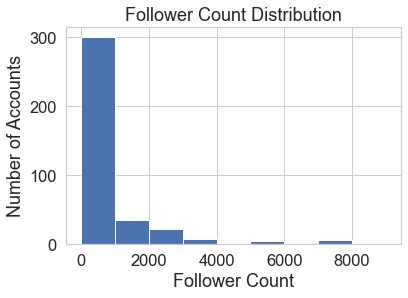

In [124]:
# follower counts
plt.hist(data['followers_count'],bins=range(0,10000,1000))
plt.xlabel('Follower Count')
plt.ylabel('Number of Accounts')
plt.title('Follower Count Distribution')
plt.show()

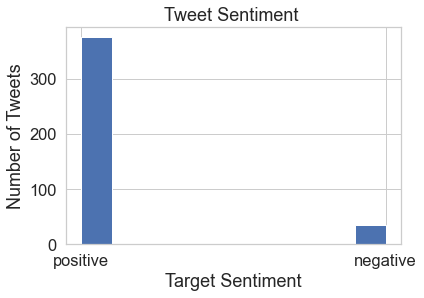

In [125]:
# Plotting vader sentiment score distribution
plt.hist(data.target)
plt.xlabel('Target Sentiment')
plt.ylabel('Number of Tweets')
plt.title('Tweet Sentiment ')
plt.show()

# Sentiment Analysis

In [126]:
from textblob import TextBlob
from wordcloud import WordCloud,STOPWORDS

### Fetching sentiment and subjectivity with textblob

In [127]:
# sentiment prediction
def textblob_sentiment(text):
    sentiment = []
    for i in text: 
        analysis = TextBlob(i)
        # set sentiment 
        if analysis.sentiment.polarity > 0:
            sentiment.append('positive')
        elif analysis.sentiment.polarity <= 0:
            sentiment.append('negative')
    return sentiment

In [128]:
# adding textblob sentiment to dataframe
data['textblob'] = textblob_sentiment(cleaned)

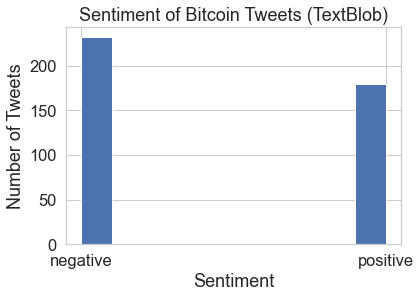

In [129]:
#plotting sentiment score results
plt.hist(data.textblob)
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.title('Sentiment of Bitcoin Tweets (TextBlob)')
plt.show()

###  Vader

In [130]:
# importing nltk and the vader lexicon
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Edvinas\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [131]:
def vader_sentiment(text):
    sentiment = []
    for i in text: 
        sid = SentimentIntensityAnalyzer()
        # set sentiment 
        ss = sid.polarity_scores(i)
        if ss["compound"] > 0:
            sentiment.append('positive')
        elif ss["compound"] <= 0:
            sentiment.append('negative')
    return sentiment

In [138]:
vader_sentiment(['Bitcoin is Awesome Man.'])

['positive']

In [140]:
vader_sentiment(['Bitcoin sucks.'])

['negative']

In [141]:
# adding vader sentiment to dataframe
data['vader'] = vader_sentiment(cleaned)

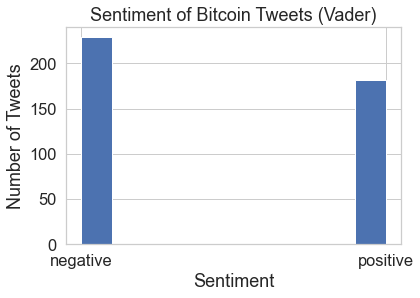

In [133]:
# Plotting vader sentiment score distribution
plt.hist(data.vader)
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.title('Sentiment of Bitcoin Tweets (Vader)')
plt.show()

### Evaluation

In [134]:
data.head(10)

,Unnamed: 0,timestamp,tweet_text,all_hashtags,retweet_count,tweet_created_at,username,followers_count,target,textblob,vader
0,0,5/3/2021 0:00,$penn $mara $aal $tsla $opti $spy $srne $coin ...,[],0,5/3/2021 0:00,Right__Stocks,988,positive,negative,negative
1,1,5/3/2021 0:00,the cavaliers have lost 20 straight games at a...,['NBATwitter'],5,5/3/2021 0:00,EliasSports,160499,negative,positive,negative
2,3,5/3/2021 0:10,aal;skdfjaow;iefj walskd;fmw;oelklooooooooooo...,[],0,5/3/2021 0:10,bberriesanon,13,positive,positive,positive
3,4,5/3/2021 0:15,$advm price target to be increased by hsbc $al...,[],0,5/3/2021 0:15,askwarrenbuffet,35150,positive,negative,positive
4,5,5/3/2021 0:17,$ver to announce new joint venture with $aal i...,[],0,5/3/2021 0:17,askwarrenbuffet,35150,positive,positive,negative
5,6,5/3/2021 0:18,sure,[],0,5/3/2021 0:18,abdul__aal,959,positive,positive,positive
6,7,5/3/2021 0:20,$penn $mara $aal $tsla $opti $spy $srne $coin ...,[],0,5/3/2021 0:20,Right__Stocks,988,positive,negative,negative
7,9,5/3/2021 0:38,hkine i'll guide you aal tari2 lsa7 💖,[],0,5/3/2021 0:38,udontgetmeehigh,1089,positive,negative,negative
8,10,5/3/2021 0:40,$penn $mara $aal $tsla $opti $spy $srne $coin ...,[],0,5/3/2021 0:40,Right__Stocks,988,positive,negative,negative
9,13,5/3/2021 0:47,"stock, options updates, alerts free chatroom d...",[],0,5/3/2021 0:47,Jackmor98705125,195,positive,positive,positive


In [135]:
from sklearn.metrics import accuracy_score, precision_score


In [136]:
# textblob Accuracy
accuracy_score(data.target,data.textblob)

0.46715328467153283

In [137]:
# Vader Accuracy
accuracy_score(data.target,data.vader)

0.48905109489051096

    ### Wordcloud

In [34]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image


In [35]:
def wc(data,cloudtitle,bgcolor,title,stopWords):
    plt.figure(figsize = (100,100))
    wc = WordCloud(background_color = bgcolor, 
                   max_words = 100,
                   max_font_size = 50,
                  stopwords=stopWords)
    wc.generate(' '.join(data))
    plt.title('')
    plt.imshow(wc)
    plt.axis('off')

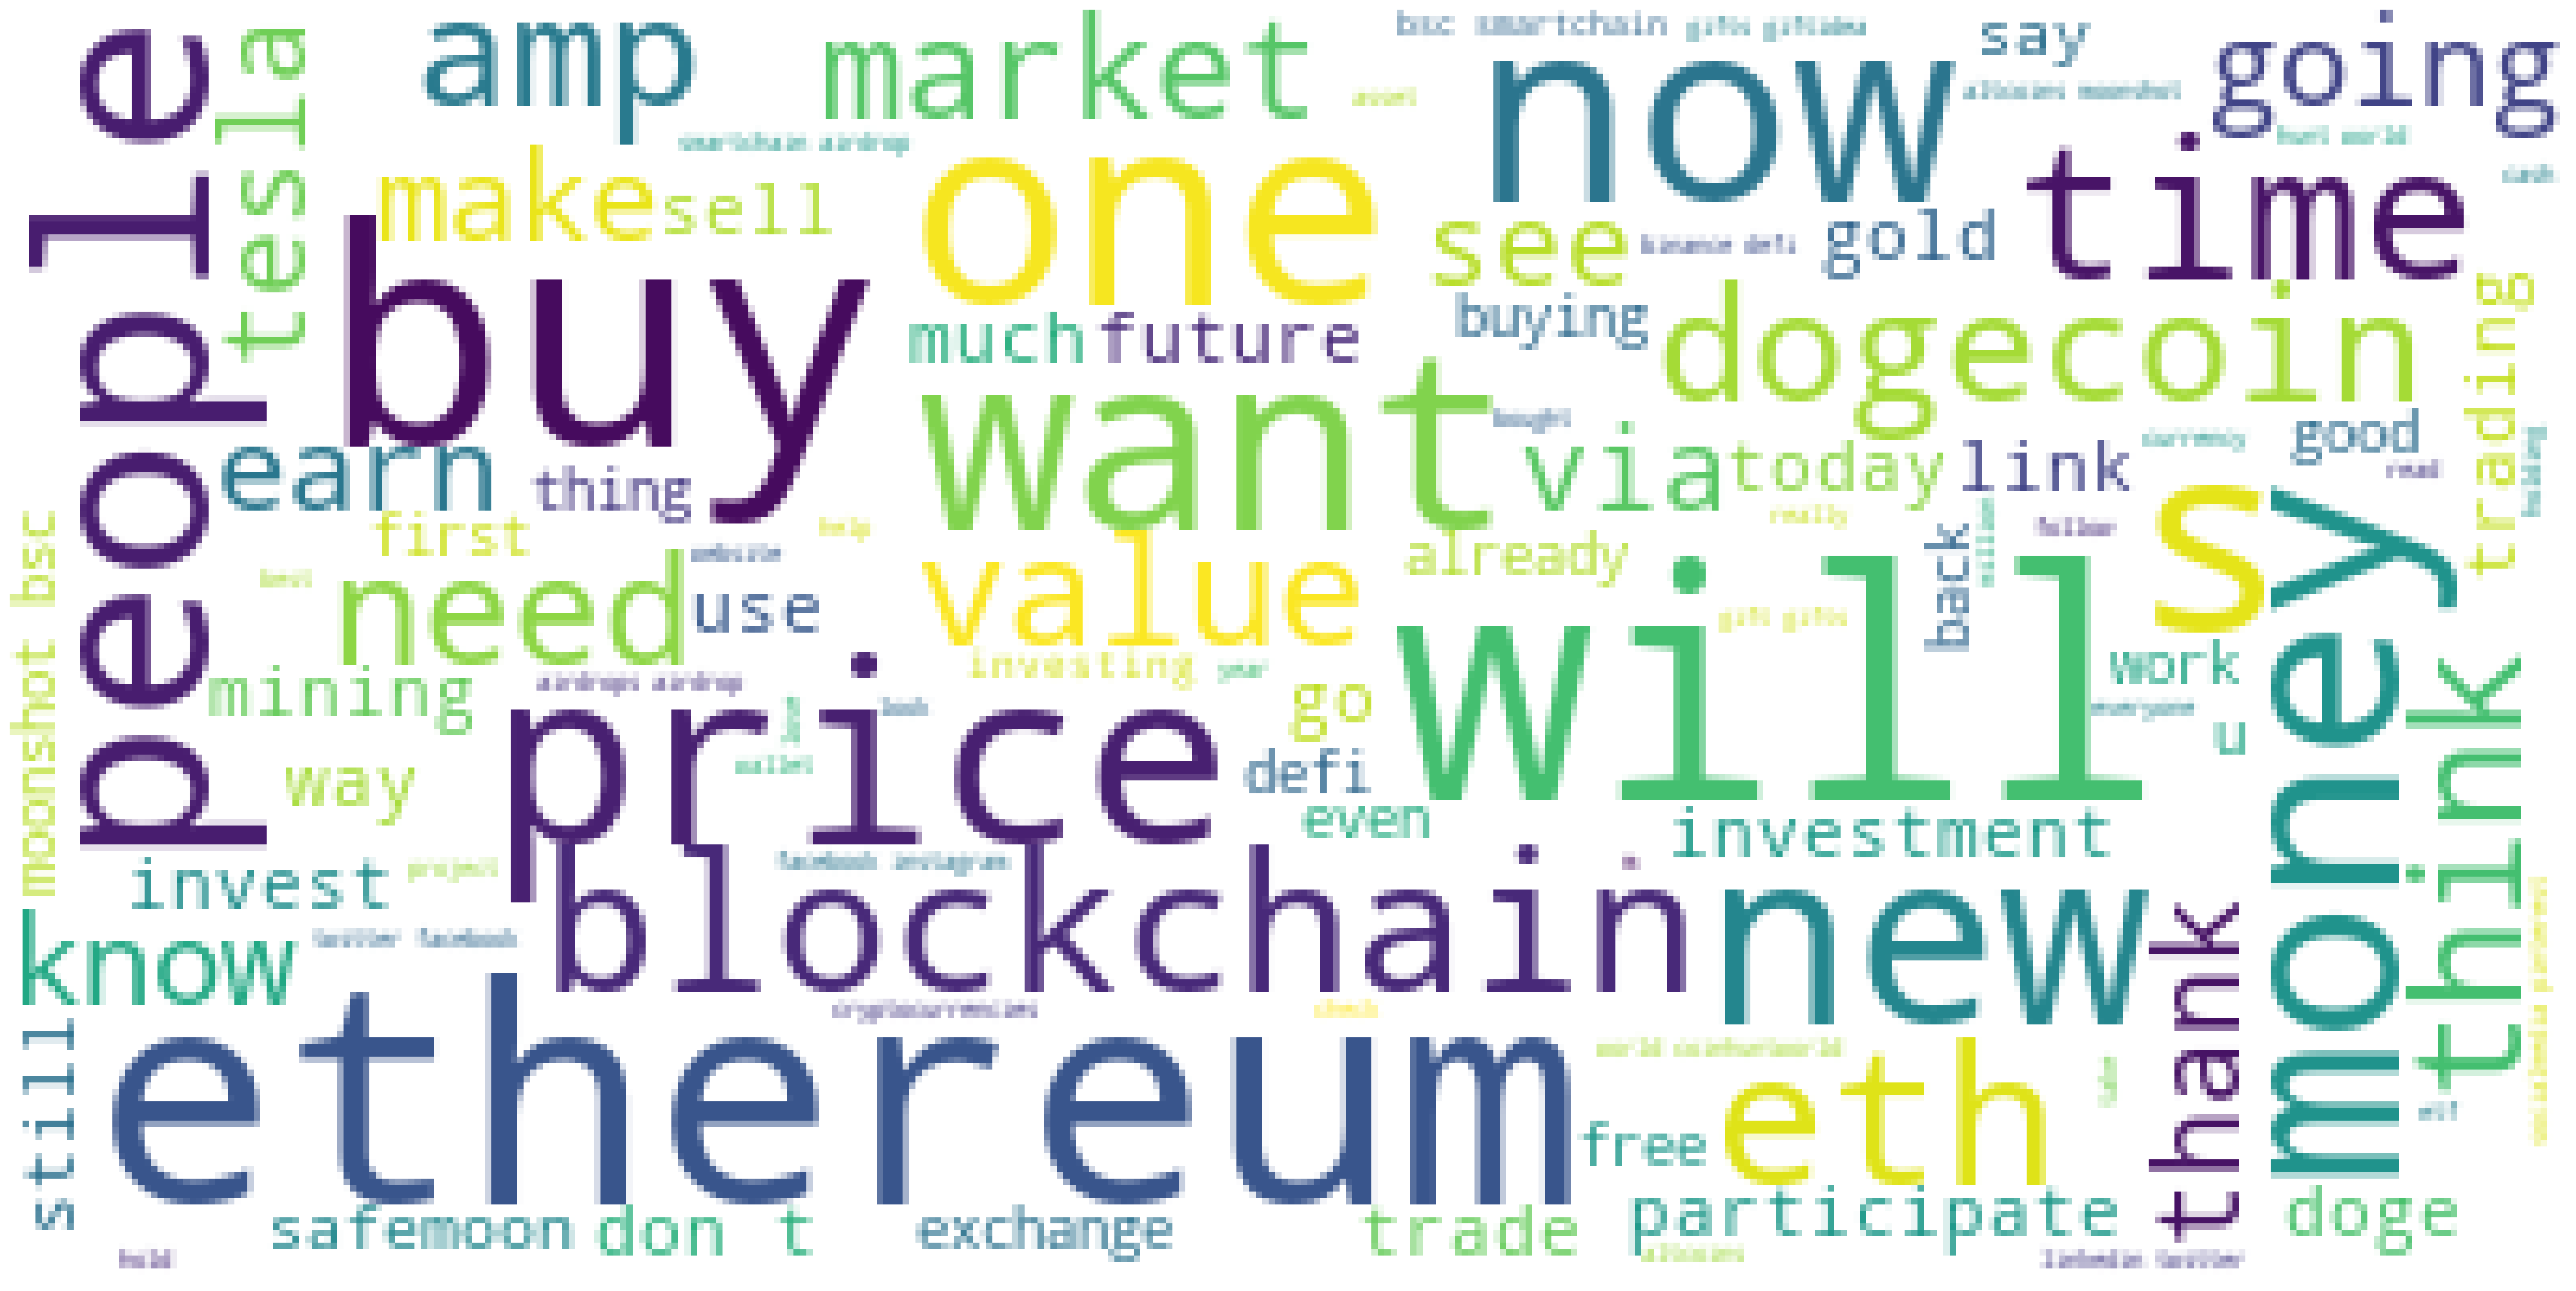

In [36]:
# Creating the custom stopwords
customStopwords=list(STOPWORDS)+ ['bitcoin','stock','crypto','btc','coin','cryptocurrency','altcoin']

# Word Cloud for all of the tweets
wc(cleaned,'All Tweets','white','Common Words',customStopwords )

In [37]:
# Word Cloud for Positive tweets

In [38]:
positive = data.loc[data['textblob']=='positive']    # fetching positive tweets

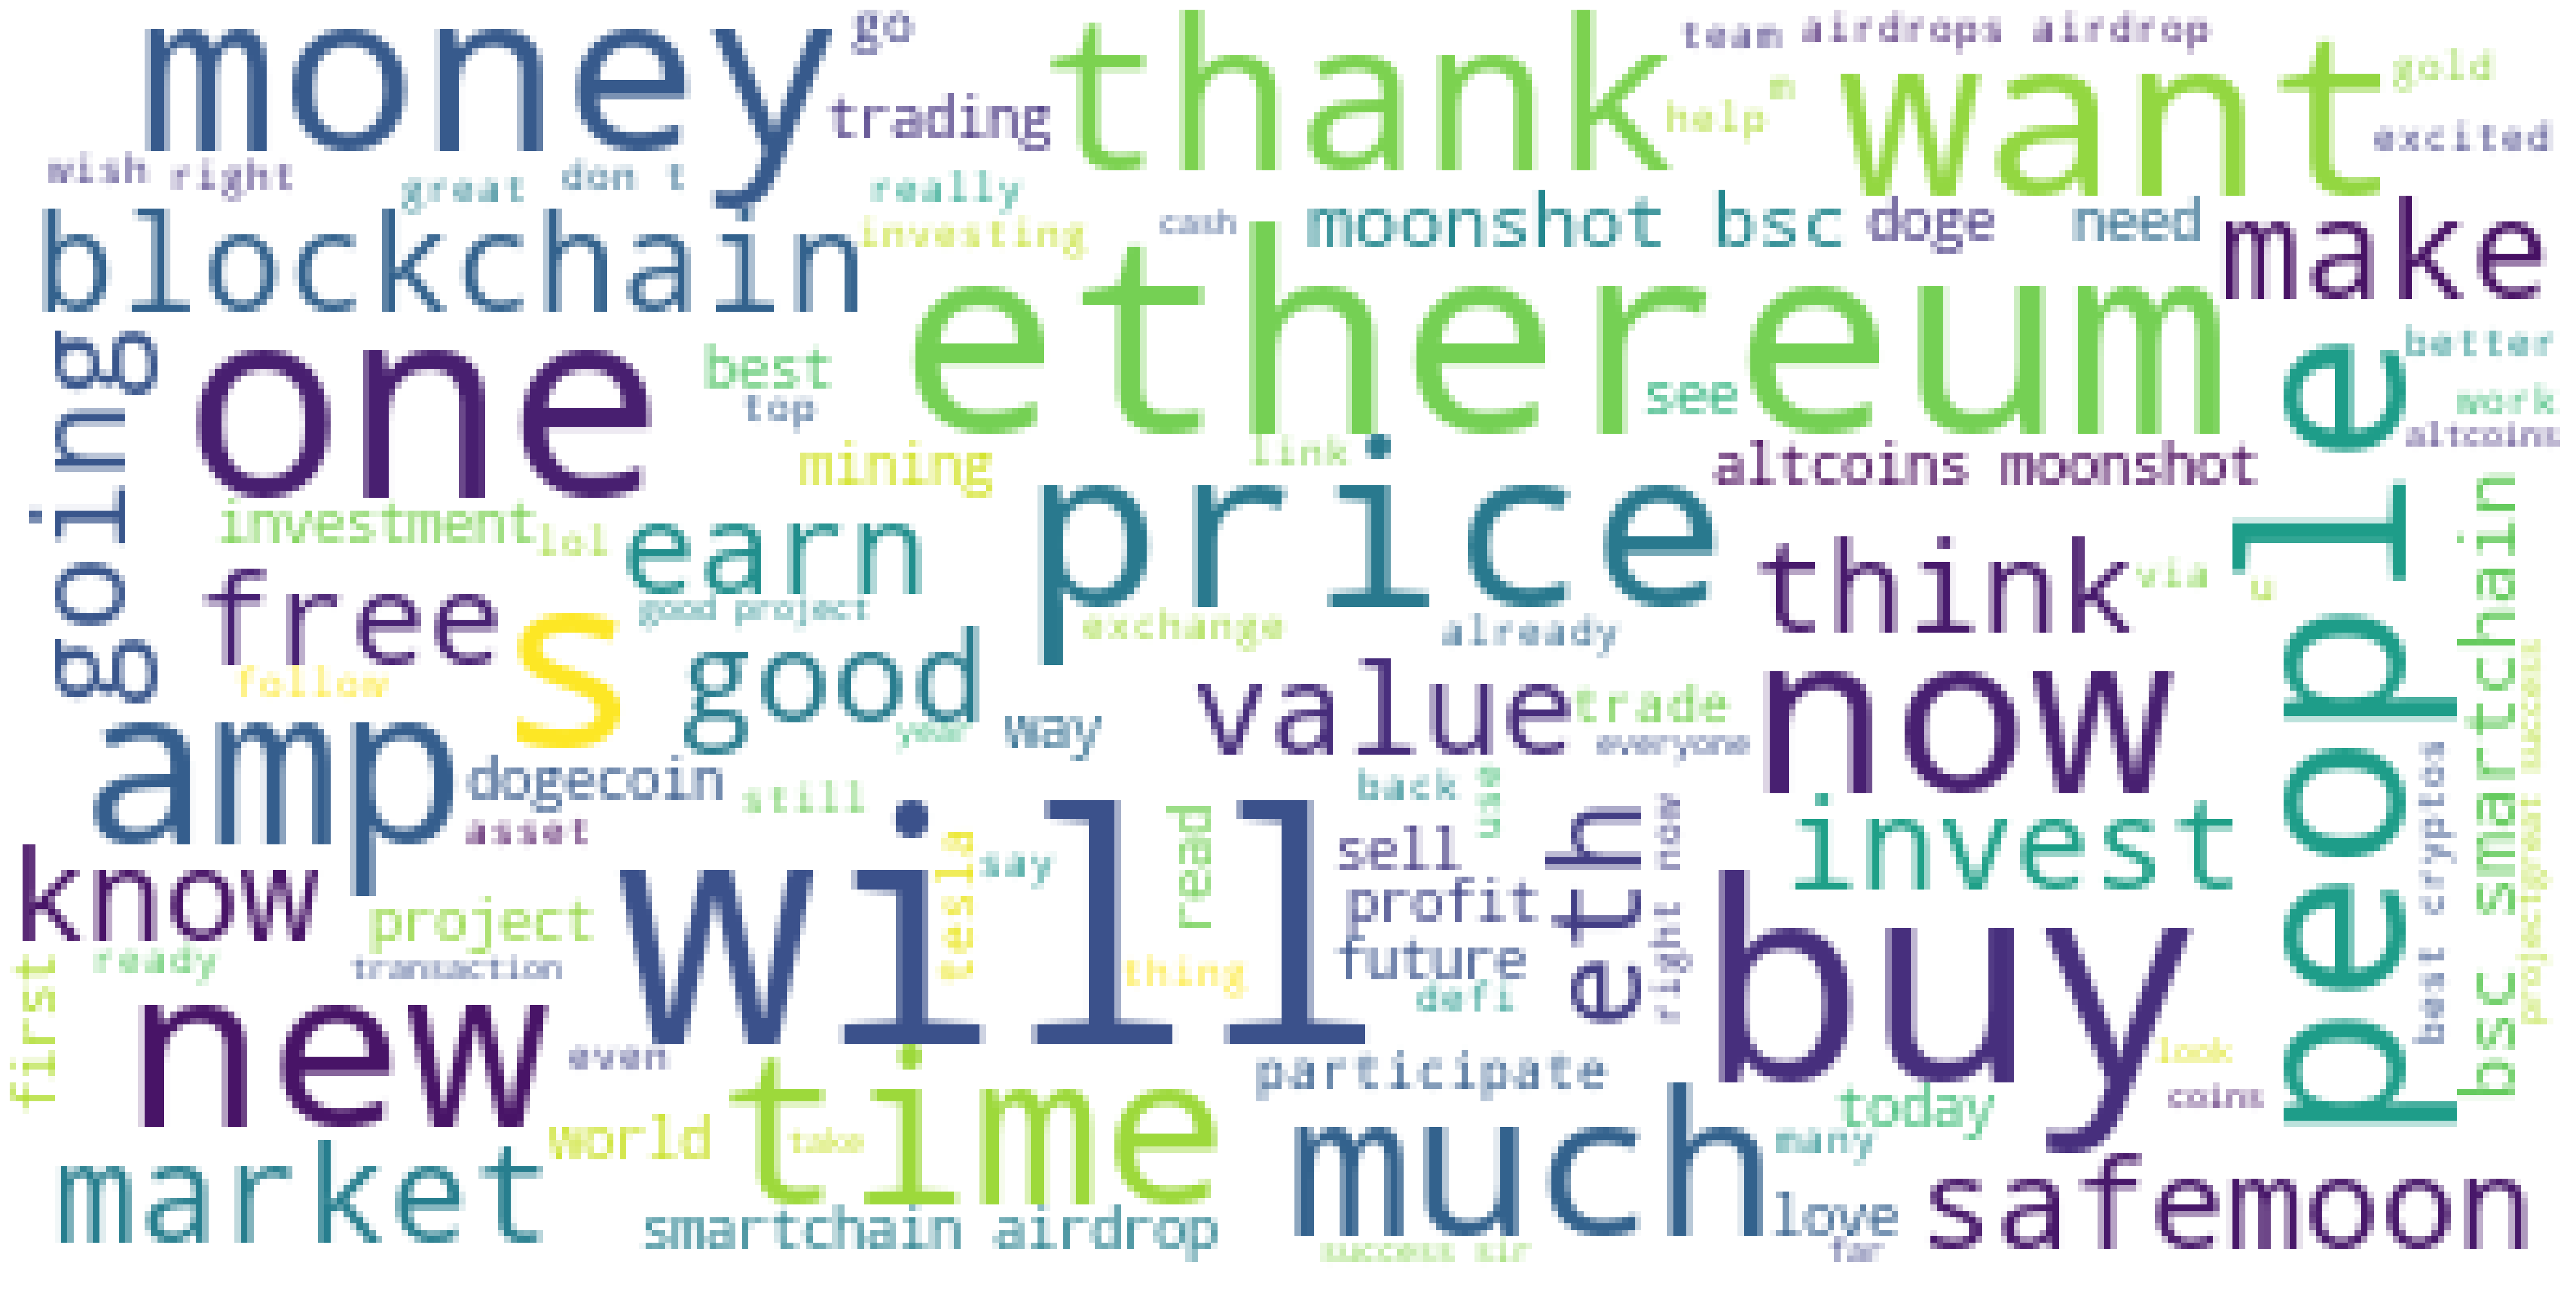

In [39]:
wc(positive.tweet_text,'Positive Tweets','white','Common Words',customStopwords )

In [40]:
# Word Cloud for Neutral Tweets

In [41]:
neutral = data.loc[data['textblob']=='neutral']   # fetching neutral tweets

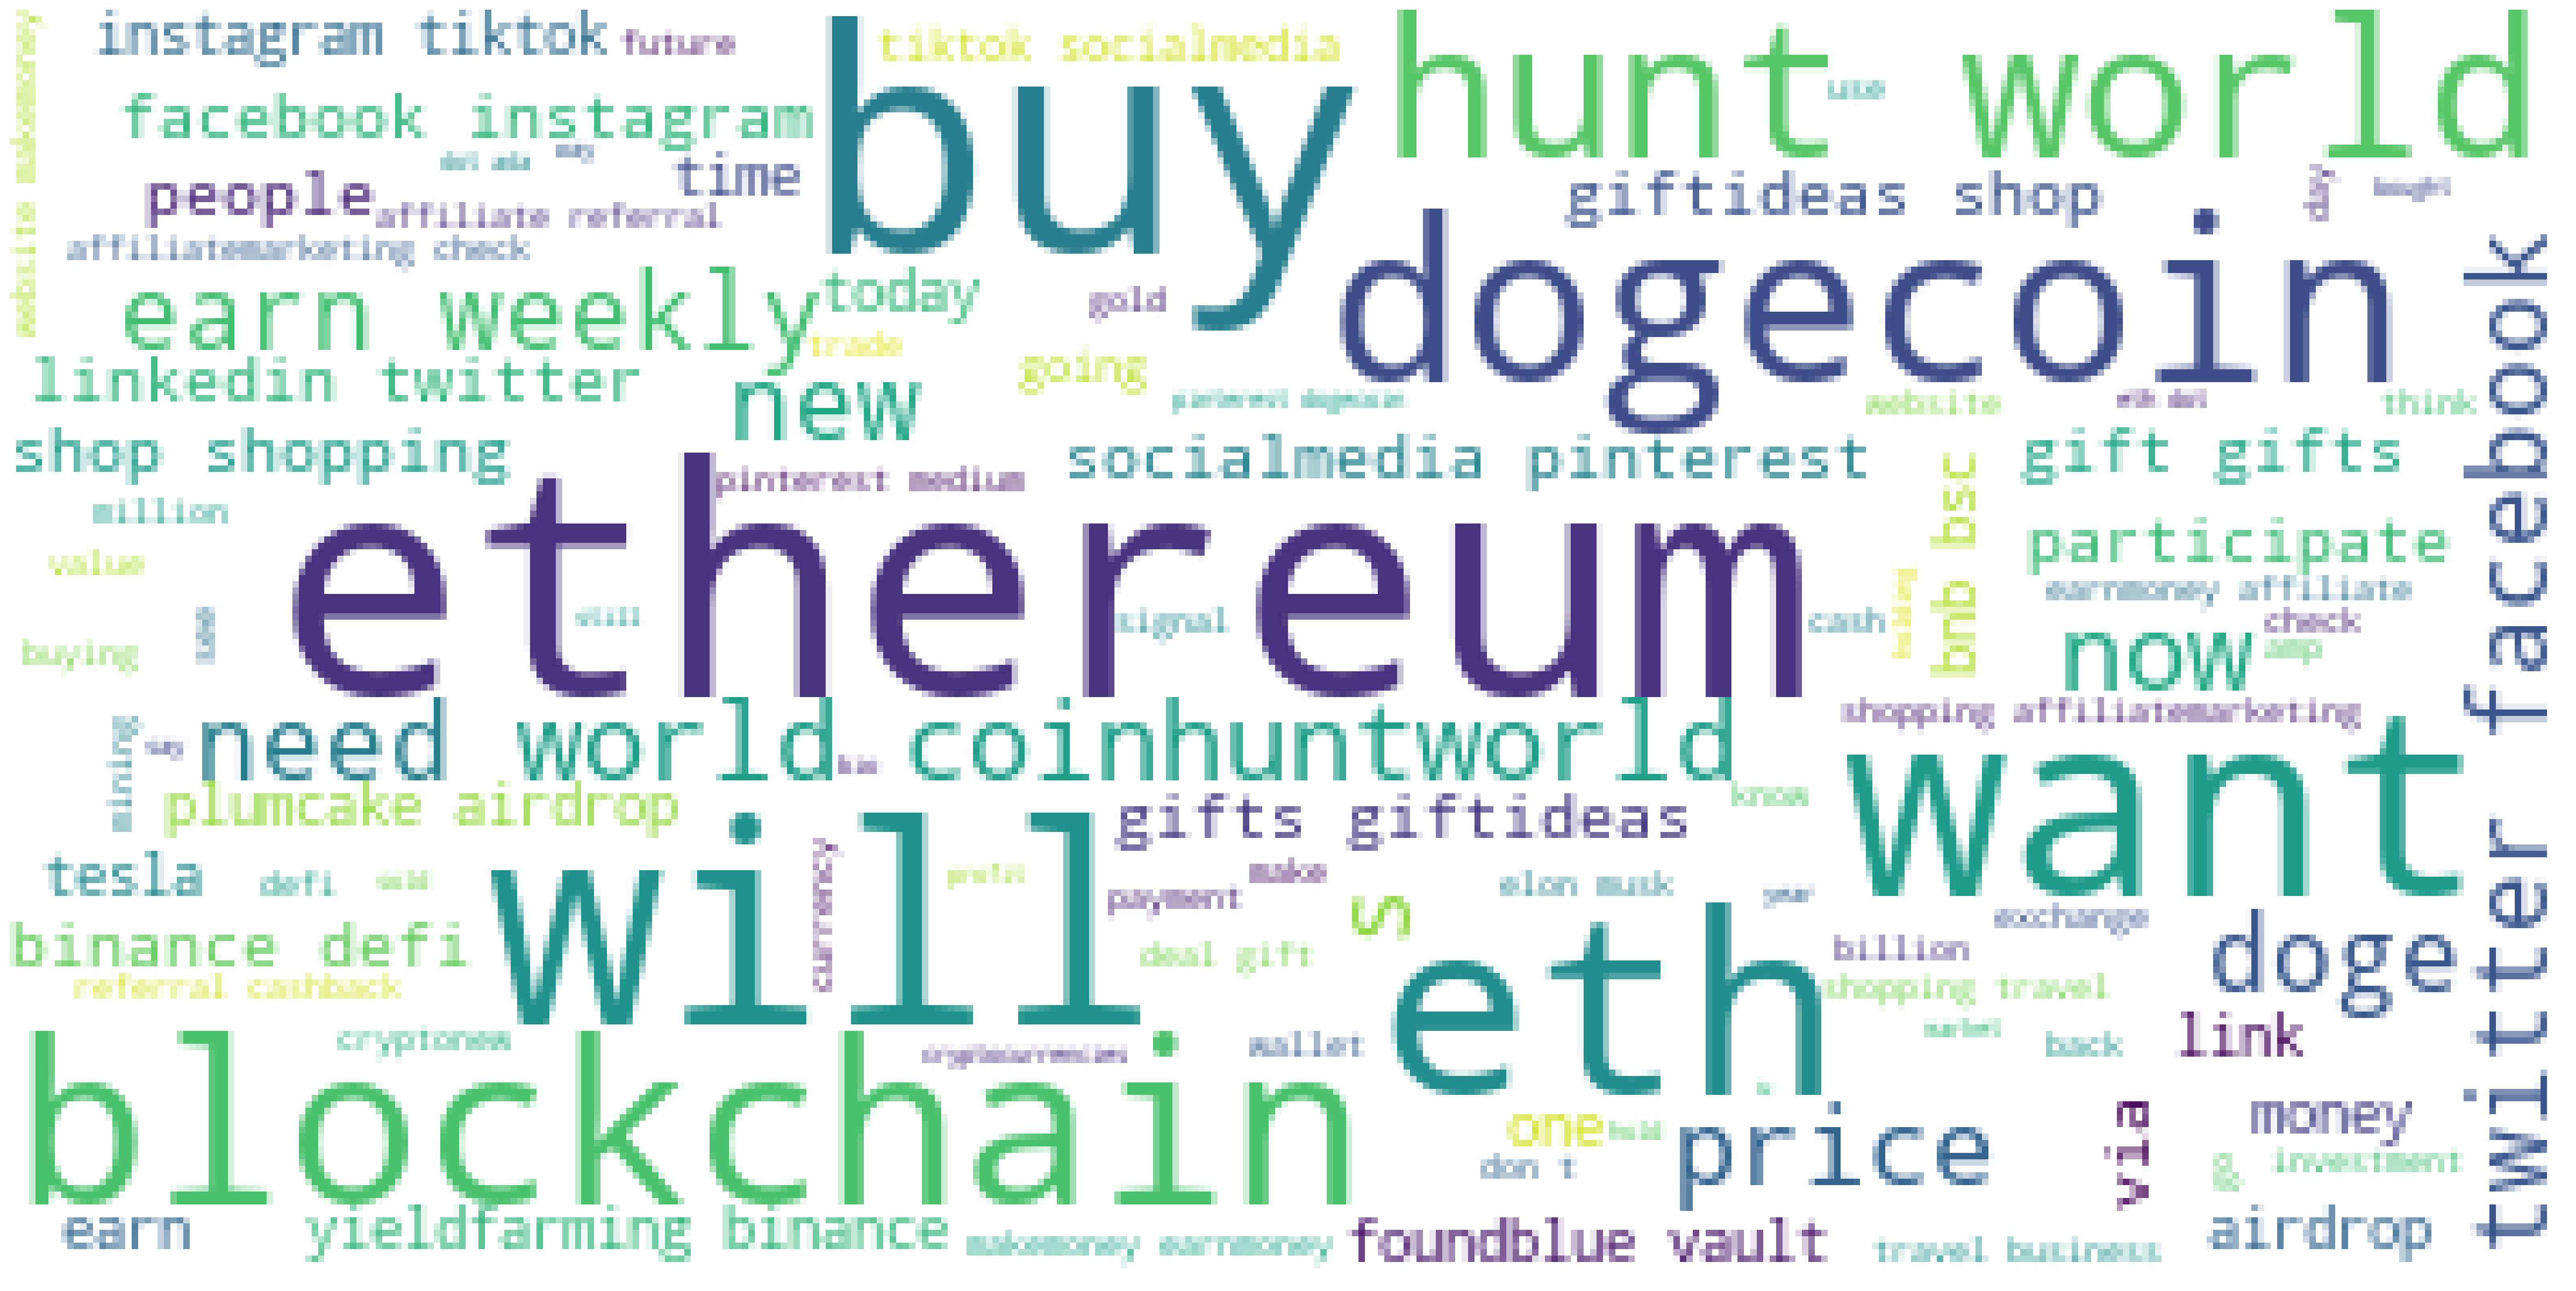

In [42]:
wc(neutral.tweet_text,'Neutral Tweets','white','Common Words',customStopwords )

In [43]:
# Word Cloud for Negative Tweets

In [44]:
negative = data.loc[data['textblob']=='negative']  # fetching negative tweets

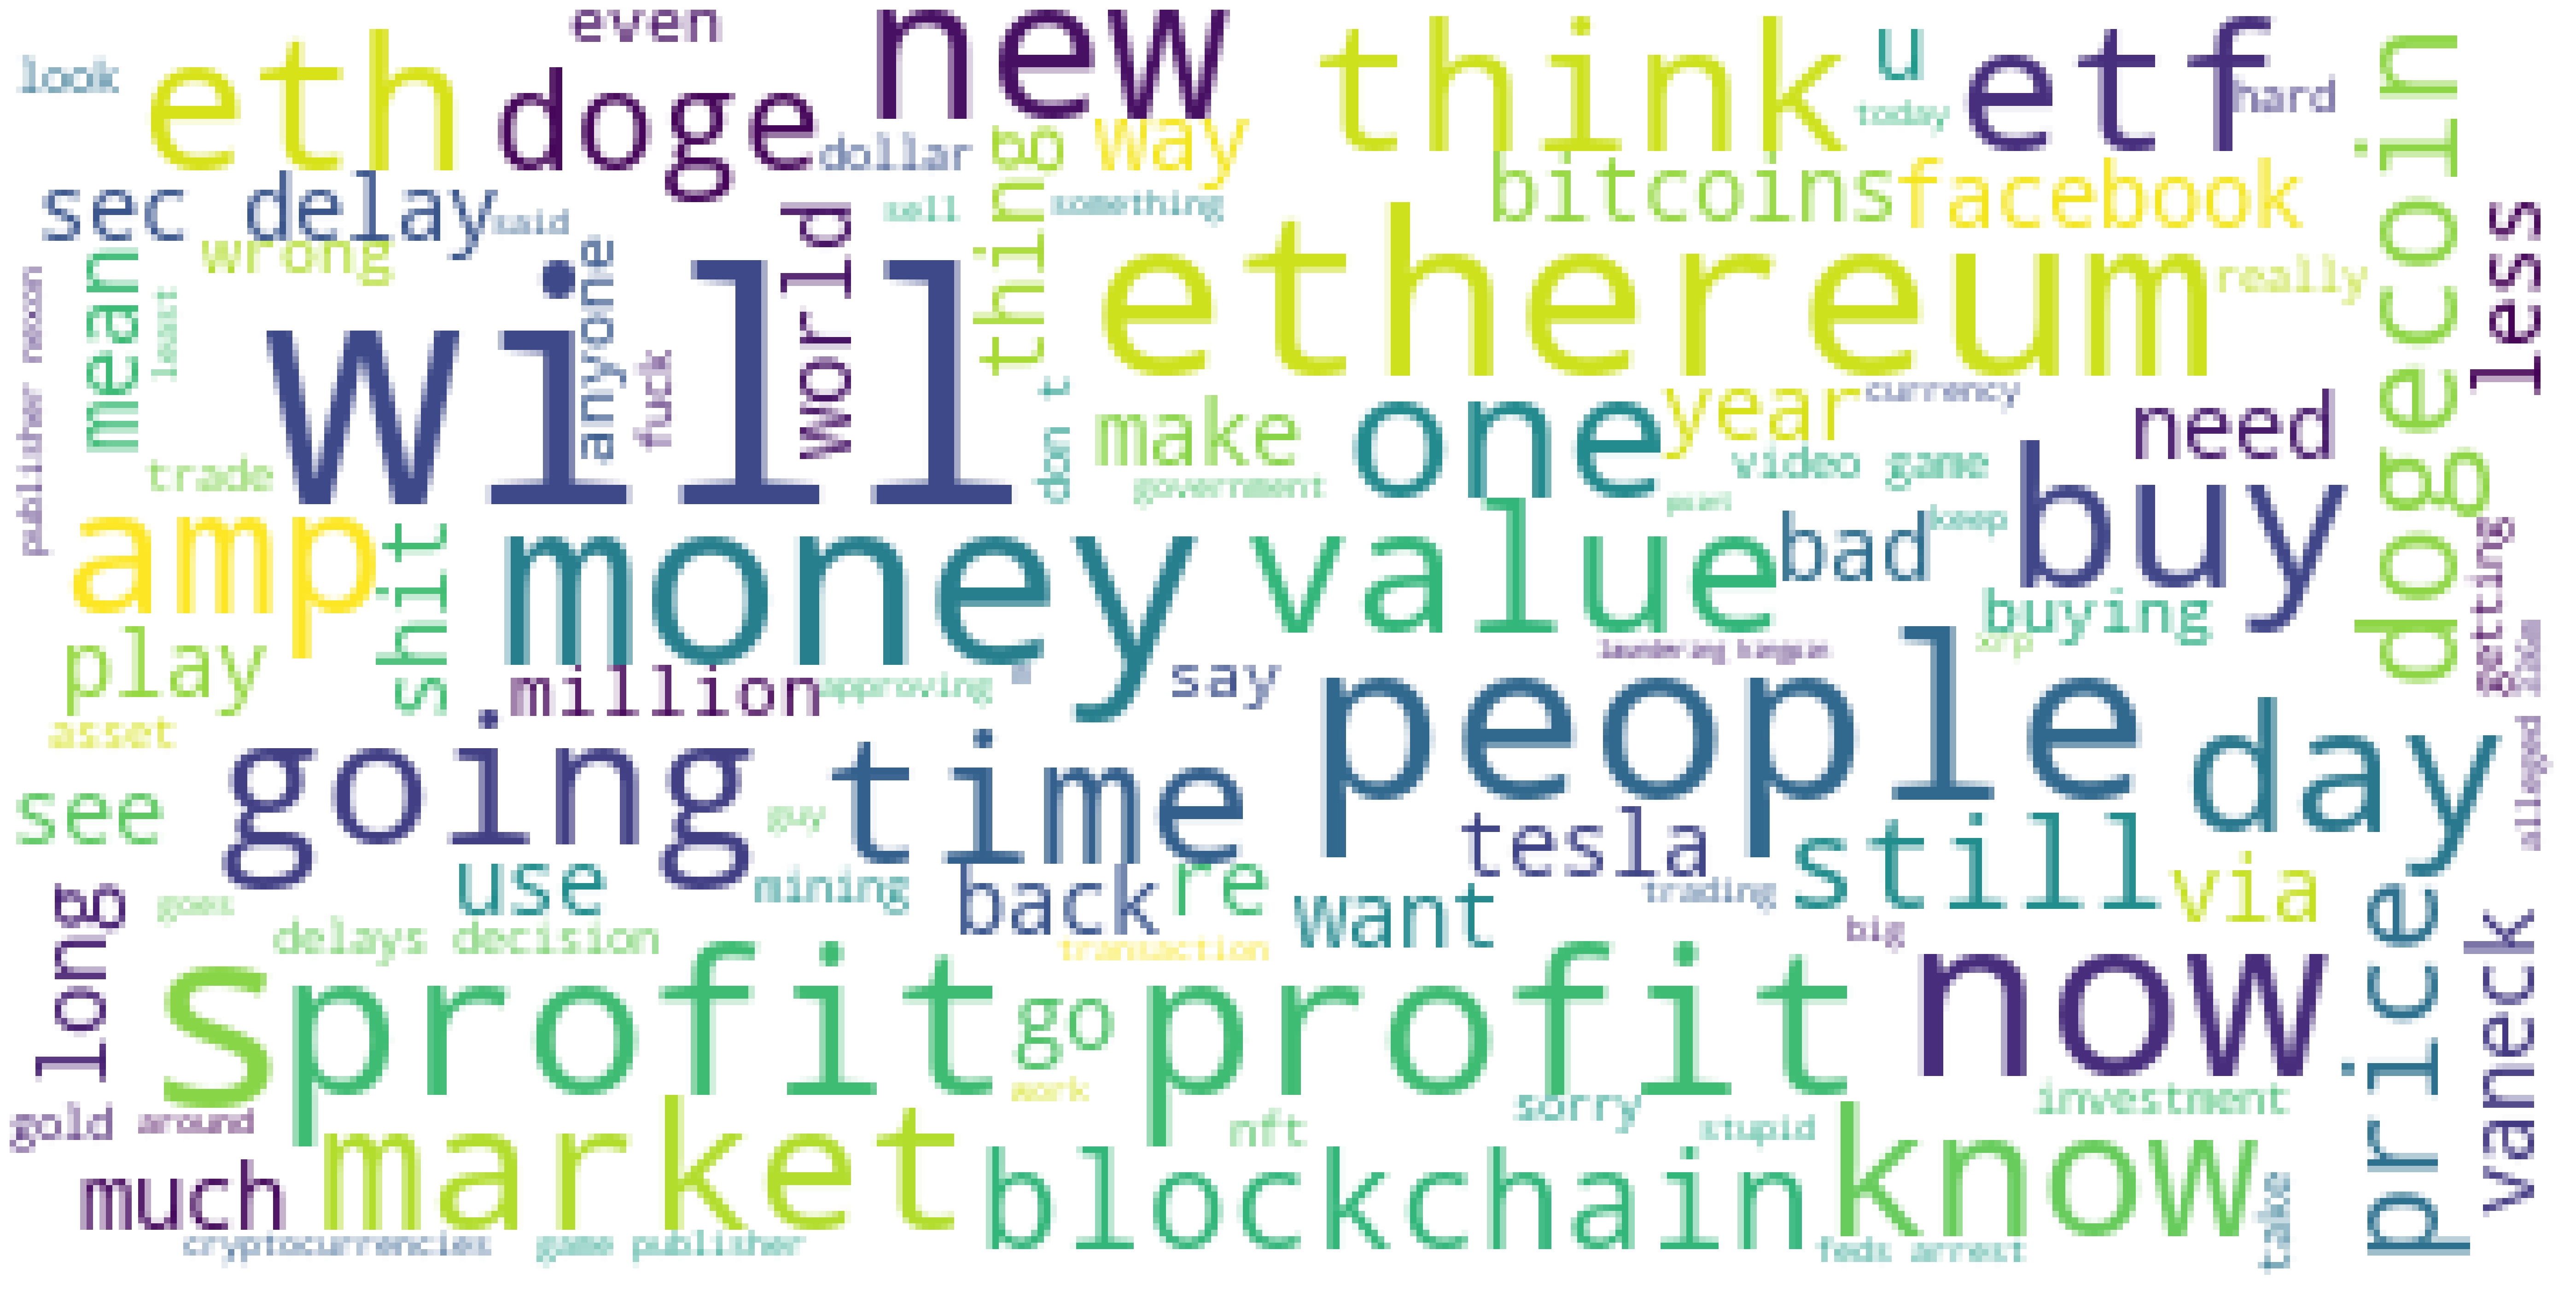

In [45]:
wc(negative.tweet_text,'Negative Tweets','white','Common Words',customStopwords )

In [ ]:

data2= pd.read_csv('hastagSPYplain.csv')
data.head(10)